In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
upload = files.upload()

Saving HR_comma_sep latih.csv to HR_comma_sep latih.csv


In [3]:
#https://www.kaggle.com/datasets/mahmoudshogaa/hr-comma-sep
df = pd.read_csv('HR_comma_sep latih.csv', sep=';')

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low


In [5]:
df = df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident', 'promotion_last_5years',	'sales',	'salary', 'left']]

#Exploratory Data Analysis

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000
mean,0.612930,0.716136,3.803388,201.057890,3.498333,0.144658,0.021275,0.237828
std,0.248608,0.171157,1.232315,49.940979,1.460351,0.351767,0.144305,0.425768
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
left                     0
dtype: int64

In [8]:
#Menghitung kelas pada target variable
df['left'].value_counts()

left
0    11428
1     3566
Name: count, dtype: int64

#Preprocessing

Encode

In [9]:
salary_ohe = pd.get_dummies(df['salary'], prefix='salary', dtype= int) #onehotencode

In [10]:
salary_ohe

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14989,0,1,0
14990,0,1,0
14991,0,1,0
14992,0,1,0


In [11]:
df = df.drop(['salary'], axis=1)

In [12]:
df = pd.concat([df, salary_ohe], axis=1)

In [13]:
df['sales'].nunique()

10

In [14]:
#fungsi hash untuk solve masalah kategori yang harus di encode
df['sales'] = df['sales'].apply(lambda x:hash(x)%1000)

In [15]:
df = df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'promotion_last_5years',	'sales',	'salary_high',	'salary_low',	'salary_medium', 'left']]

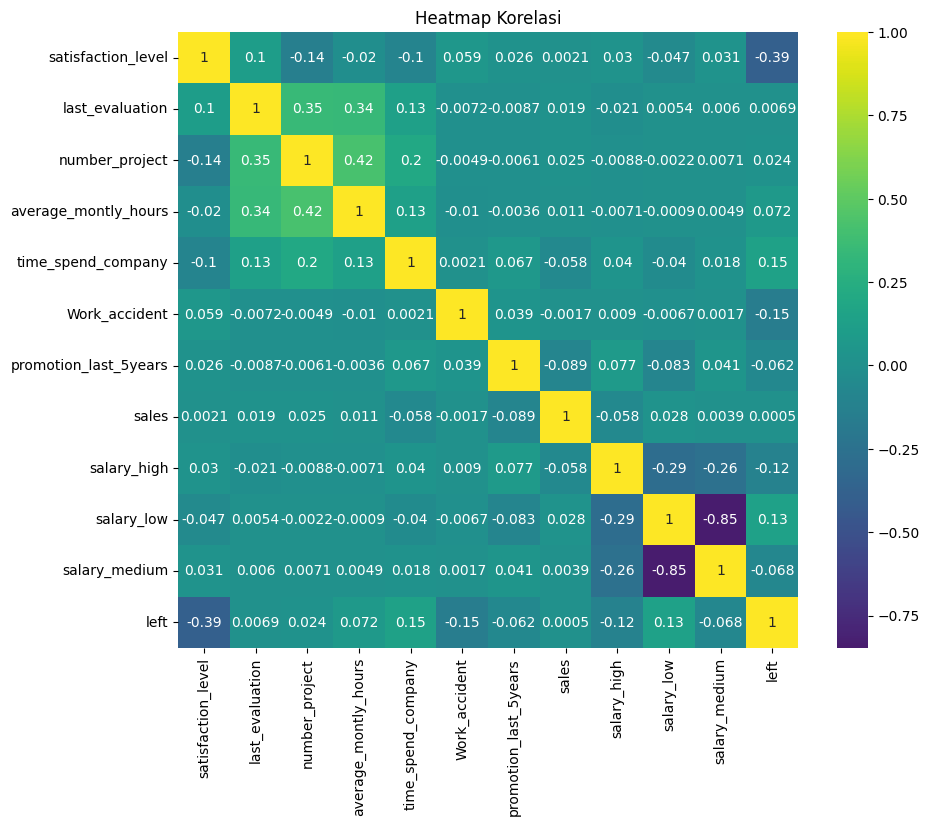

In [16]:
correlation_matrix = df.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Heatmap Korelasi')
plt.show()

Normalisasi

In [17]:
for i in['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'promotion_last_5years', 'sales']:
  df[i] = (df[i]-min(df[i]))/(max(df[i])-min(df[i]))

In [18]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary_high,salary_low,salary_medium,left
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.069645,0,1,0,1
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.069645,0,0,1,1
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.069645,0,0,1,1
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.069645,0,1,0,1
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.069645,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14989,0.373626,0.328125,0.0,0.294393,0.125,1.0,0.0,0.614980,0,1,0,1
14990,0.879121,0.812500,0.6,0.616822,0.375,1.0,0.0,0.660972,0,1,0,1
14991,0.000000,0.703125,0.8,0.752336,0.250,0.0,0.0,0.660972,0,1,0,1
14992,0.340659,0.187500,0.0,0.275701,0.125,0.0,0.0,0.660972,0,1,0,1


Data Partitioning

In [19]:
X = df.drop(['left'], axis=1) #Independent Variable

In [20]:
y = df['left'] #Dependent variable/target/label

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<ipython-input-23-65b83ae06119>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_sebelum_smote.index, y=y_sebelum_smote.values, ax=ax[0], palette="viridis")
<ipython-input-23-65b83ae06119>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_setelah_smote.index, y=y_setelah_smote.values, ax=ax[1], palette="viridis")


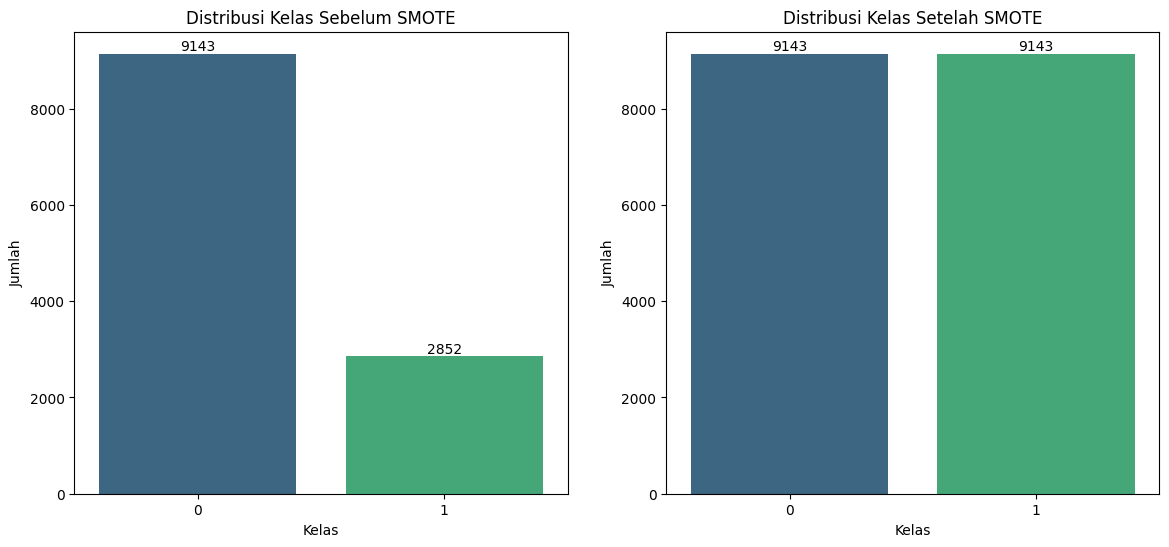

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2, k_neighbors=3)

X_sm, y_sm = sm.fit_resample(X_train,y_train)

y_sebelum_smote = pd.Series(y_train).value_counts()
y_setelah_smote = pd.Series(y_sm).value_counts()

# Visualisasi distribusi kelas sebelum dan sesudah SMOTE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=y_sebelum_smote.index, y=y_sebelum_smote.values, ax=ax[0], palette="viridis")
ax[0].set_title('Distribusi Kelas Sebelum SMOTE')
ax[0].set_xlabel('Kelas')
ax[0].set_ylabel('Jumlah')
for i in range(len(y_sebelum_smote)):
    ax[0].text(i, y_sebelum_smote[i] + 5, str(y_sebelum_smote[i]), ha='center', va='bottom')

sns.barplot(x=y_setelah_smote.index, y=y_setelah_smote.values, ax=ax[1], palette="viridis")
ax[1].set_title('Distribusi Kelas Setelah SMOTE')
ax[1].set_xlabel('Kelas')
ax[1].set_ylabel('Jumlah')
for i in range(len(y_setelah_smote)):
    ax[1].text(i, y_setelah_smote[i] + 5, str(y_setelah_smote[i]), ha='center', va='bottom')

plt.show()


Building Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(X_sm, y_sm)

RandomForestClassifier()

In [27]:
y_hat = rf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [29]:
acc = accuracy_score(y_hat, y_test)
recall = recall_score(y_hat, y_test)
precision = precision_score(y_hat, y_test)


print('acc :', acc)
print('recall :', recall)
print('precision :',  precision)


acc : 0.9889963321107036
recall : 0.985734664764622
precision : 0.9677871148459384


In [30]:
y_hat

array([1, 1, 1, ..., 0, 1, 0])

In [31]:
y_test

12582    1
14308    1
14413    1
1802     1
4459     0
        ..
7840     0
4555     0
10591    0
1439     1
9847     0
Name: left, Length: 2999, dtype: int64

In [32]:
hasil = pd.DataFrame({'y_test': y_test,
                      'y_hat': y_hat})
hasil

,y_test,y_hat
12582,1,1
14308,1,1
14413,1,1
1802,1,1
4459,0,0
...,...,...
7840,0,0
4555,0,0
10591,0,0
1439,1,1


In [33]:
df_awal = pd.read_csv('HR_comma_sep latih.csv', sep=';')
df_awal

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low


In [34]:
#Menyatukan X_test dengan y_test dan y_hat
combined_df = hasil.merge(df_awal, left_index=True, right_index=True)
combined_df

,y_test,y_hat,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
12582,1,1,0.74,0.87,5,242,5,0,1,0,support,medium
14308,1,1,0.10,0.84,6,279,4,0,1,0,sales,low
14413,1,1,0.76,1.00,5,219,5,0,1,0,support,low
1802,1,1,0.11,0.88,6,253,4,0,1,0,support,low
4459,0,0,0.69,0.82,4,273,4,0,0,0,hr,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
7840,0,0,0.71,0.55,5,262,3,0,0,0,support,medium
4555,0,0,1.00,0.59,3,168,3,0,0,1,support,low
10591,0,0,0.98,0.79,5,257,4,0,0,0,technical,medium
1439,1,1,0.76,0.99,4,253,5,1,1,0,IT,medium


In [53]:
combined_df.to_csv('hasil prediksi turnover.csv')
files.download('hasil prediksi turnover.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Data Baru

In [54]:
from google.colab import files
upload = files.upload()

Saving data test.csv to data test (1).csv


In [37]:
df_test = pd.read_csv('data test.csv', sep=';')
df_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.40,0.57,2,151,3,0,NaN,0,support,low
1,0.37,0.48,2,160,3,0,NaN,0,support,low
2,0.37,0.53,2,143,3,0,NaN,0,support,low
3,0.11,0.96,6,280,4,0,NaN,0,support,low
4,0.37,0.52,2,158,3,0,NaN,0,support,low


In [38]:
df_2 = pd.concat([df_awal, df_test], axis=0)
df_2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1.0,0,sales,low
1,0.80,0.86,5,262,6,0,1.0,0,sales,medium
2,0.11,0.88,7,272,4,0,1.0,0,sales,medium
3,0.72,0.87,5,223,5,0,1.0,0,sales,low
4,0.37,0.52,2,159,3,0,1.0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
0,0.40,0.57,2,151,3,0,NaN,0,support,low
1,0.37,0.48,2,160,3,0,NaN,0,support,low
2,0.37,0.53,2,143,3,0,NaN,0,support,low
3,0.11,0.96,6,280,4,0,NaN,0,support,low


In [39]:
df_2 = df_2.reset_index()
df_2

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1.0,0,sales,low
1,1,0.80,0.86,5,262,6,0,1.0,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1.0,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1.0,0,sales,low
4,4,0.37,0.52,2,159,3,0,1.0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0.40,0.57,2,151,3,0,NaN,0,support,low
14995,1,0.37,0.48,2,160,3,0,NaN,0,support,low
14996,2,0.37,0.53,2,143,3,0,NaN,0,support,low
14997,3,0.11,0.96,6,280,4,0,NaN,0,support,low


In [40]:
df_2 = df_2.drop(['index'], axis=1)

In [41]:
salary_ohe = pd.get_dummies(df_2['salary'], prefix='salary', dtype= int) #onehotencode

In [42]:
df_2 = df_2.drop(['salary'], axis=1)

In [43]:
df_2 = pd.concat([df_2, salary_ohe], axis=1)

In [44]:
#fungsi hash untuk solve masalah kategori yang harus di encode
df_2['sales'] = df_2['sales'].apply(lambda x:hash(x)%1000)

In [45]:
for i in['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'promotion_last_5years', 'sales']:
  df_2[i] = (df_2[i]-min(df_2[i]))/(max(df_2[i])-min(df_2[i]))

In [46]:
#Misahin data uji
uji = df_2[df_2.isnull().any(axis=1)]
uji

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary_high,salary_low,salary_medium
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,NaN,0.0,0.660972,0,1,0
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,NaN,0.0,0.660972,0,1,0
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,NaN,0.0,0.660972,0,1,0
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,NaN,0.0,0.660972,0,1,0
14998,0.307692,0.250000,0.0,0.289720,0.125,0.0,NaN,0.0,0.660972,0,1,0


In [47]:
latih = df_2[~df_2.isnull().any(axis=1)]
latih

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.069645,0,1,0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.069645,0,0,1
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.069645,0,0,1
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.069645,0,1,0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.069645,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14989,0.373626,0.328125,0.0,0.294393,0.125,1.0,1.0,0.0,0.614980,0,1,0
14990,0.879121,0.812500,0.6,0.616822,0.375,1.0,1.0,0.0,0.660972,0,1,0
14991,0.000000,0.703125,0.8,0.752336,0.250,0.0,1.0,0.0,0.660972,0,1,0
14992,0.340659,0.187500,0.0,0.275701,0.125,0.0,1.0,0.0,0.660972,0,1,0


In [48]:
#Pembagian X_train, X_test, y_train, y_test
X_train = latih.drop(['left'], axis=1)
y_train = latih['left']

X_test = uji.drop(['left'], axis=1)
y_test = uji['left']

In [49]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary_high,salary_low,salary_medium
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,0.0,0.660972,0,1,0
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,0.0,0.660972,0,1,0
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,0.0,0.660972,0,1,0
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,0.0,0.660972,0,1,0
14998,0.307692,0.250000,0.0,0.289720,0.125,0.0,0.0,0.660972,0,1,0


<ipython-input-50-c21b6d5fa0a2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_sebelum_smote.index, y=y_sebelum_smote.values, ax=ax[0], palette="viridis")
<ipython-input-50-c21b6d5fa0a2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_setelah_smote.index, y=y_setelah_smote.values, ax=ax[1], palette="viridis")


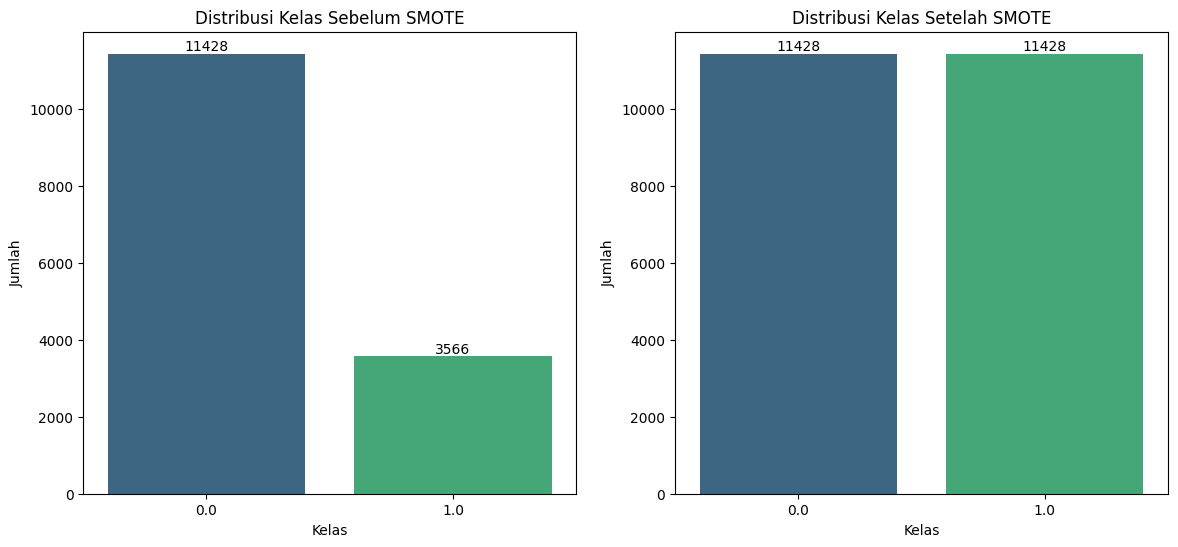

In [50]:

sm = SMOTE(random_state=2, k_neighbors=3)

X_sm_2, y_sm_2 = sm.fit_resample(X_train,y_train)

y_sebelum_smote = pd.Series(y_train).value_counts()
y_setelah_smote = pd.Series(y_sm_2).value_counts()

# Visualisasi distribusi kelas sebelum dan sesudah SMOTE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=y_sebelum_smote.index, y=y_sebelum_smote.values, ax=ax[0], palette="viridis")
ax[0].set_title('Distribusi Kelas Sebelum SMOTE')
ax[0].set_xlabel('Kelas')
ax[0].set_ylabel('Jumlah')
for i in range(len(y_sebelum_smote)):
    ax[0].text(i, y_sebelum_smote[i] + 5, str(y_sebelum_smote[i]), ha='center', va='bottom')

sns.barplot(x=y_setelah_smote.index, y=y_setelah_smote.values, ax=ax[1], palette="viridis")
ax[1].set_title('Distribusi Kelas Setelah SMOTE')
ax[1].set_xlabel('Kelas')
ax[1].set_ylabel('Jumlah')
for i in range(len(y_setelah_smote)):
    ax[1].text(i, y_setelah_smote[i] + 5, str(y_setelah_smote[i]), ha='center', va='bottom')

plt.show()


In [51]:
rf.fit(X_sm_2, y_sm_2)

RandomForestClassifier()

In [52]:
y_hat_2 = rf.predict(X_test)
y_hat_2

array([1., 1., 1., 1., 1.])